<h1 style="text-align:center; font-variant: small-caps;">Mechanical analysis of TiFoSi data</h1>
<!--<h3 style="text-align:center;"> </h3> -->

In [1]:
# you can install the required packages using pip: pip install numpy matplotlib scipy statsmodels 
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from statsmodels.stats.weightstats import DescrStatsW 
import os

# Import necessary functions
from FunctionDefinitions import *

# Constants
N_frames = 25 + 150 + 200
num_species_proteins = 2  # Rho and Myosin

# Paths to the data files
folder_path = "RhoMyosin/"
dforces_path = os.path.join(folder_path, "dforces.dat")
dcells_path = os.path.join(folder_path, "dcells.dat")
denergy_path = os.path.join(folder_path, "denergy.dat")
division_path = os.path.join(folder_path, "divisions.dat")
tifosi_log_path = os.path.join(folder_path, "tifosi.log")

# Reading the data files dforces.dat and dcells.dat
start_lines_dforces, end_lines_dforces = start_end_lines_frames(dforces_path, N_frames)
start_lines_dcells, end_lines_dcells = start_end_lines_frames(dcells_path, N_frames)
dforces_info_global = read_all_frames(dforces_path, start_lines_dforces, end_lines_dforces)
dcells_info_global = read_all_frames(dcells_path, start_lines_dcells, end_lines_dcells)

# Creating a folder to save the images
figures_path = os.path.join(folder_path, "figures")
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

# Creating folders to save movies and the images to generate them
movies_path = os.path.join(folder_path, "movies")
if not os.path.exists(movies_path):
    os.makedirs(movies_path)
    os.makedirs(os.path.join(movies_path, "images"))

# Day 1: Introduction and Setup

<ol style="list-style-type: none;">
  <li><strong>a)</strong> Handling output files and generating movies</li>
  <li><strong>b)</strong> Exploring cell number as a function of time</li>
  <li><strong>c)</strong> Quantitative analysis of tissue architecture:
    <ol style="list-style-type: none;">
      <li><strong>c.1)</strong> Number of neighbors distribution</li>
      <li><strong>c.2)</strong> Area distribution</li> 
      <li><strong>c.3)</strong> Perimeter distribution</li>
      <li><strong>c.4)</strong> Distribution of cell orientations after division</li>
    </ol>
  </li>
  <li><strong>d)</strong> <span style="color: yellow;">Extra</span> Force visualization and analysis</li>
</ol>

## **a)** Movies

In [3]:
# Call to the python script that generates the images for the video
inputfolder = os.path.join("./", folder_path)
outputfolder = os.path.join("./", movies_path, "images/")

# Run the plot generation script
cmd = [
    "python",
    "makePlot.py",
    "--ifolder", inputfolder,
    "--ofolder", outputfolder,
    "--dpi", "200",
    "--cmap", "viridis"
]

try:
    subprocess.run(cmd, check=True)
except subprocess.CalledProcessError as e:
    print(f"Error running makePlot.py: {e}")
except FileNotFoundError:
    print("python command not found or makePlot.py doesn't exist")

# Usage example:
images_path = os.path.join(movies_path, "images/")

# Create videos from the generated images
try:
    create_movie_ffmpeg(
        os.path.join(images_path, "plot.*.type.png"),
        os.path.join(movies_path, "cell_type.mp4"),
        fps=10
    )
    
    create_movie_ffmpeg(
        os.path.join(images_path, "plot.*.rho.png"),
        os.path.join(movies_path, "rho.mp4"),
        fps=10
    )
    
    create_movie_ffmpeg(
        os.path.join(images_path, "plot.*.M.png"),
        os.path.join(movies_path, "M.mp4"),
        fps=10
    )
except Exception as e:
    print(f"Error creating videos: {e}")

/home/marie/anadal/Documentos/Curso EMBL/FuncionesPython/makePlot.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap(cmap)
/home/marie/anadal/Documentos/Curso EMBL/FuncionesPython/makePlot.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmapType = matplotlib.cm.get_cmap(cmapType)


Loading data...
Plotting protein frames...
Plotting cell type frames...
Found 375 images to process
Preparing frames...
Processed 20 of 375 images
Processed 40 of 375 images
Processed 60 of 375 images
Processed 80 of 375 images
Processed 100 of 375 images
Processed 120 of 375 images
Processed 140 of 375 images
Processed 160 of 375 images
Processed 180 of 375 images
Processed 200 of 375 images
Processed 220 of 375 images
Processed 240 of 375 images
Processed 260 of 375 images
Processed 280 of 375 images
Processed 300 of 375 images
Processed 320 of 375 images
Processed 340 of 375 images
Processed 360 of 375 images
Processed 375 of 375 images
Running ffmpeg command: ffmpeg -y -framerate 10 -i temp_frames/frame_%04d.png -vf scale=trunc(iw/2)*2:trunc(ih/2)*2 -c:v libx264 -pix_fmt yuv420p -crf 18 /home/marie/anadal/Documentos/Curso EMBL/FuncionesPython/RhoMyosin/movies/cell_type.mp4


ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --ena

Movie saved to RhoMyosin/movies/cell_type.mp4
Found 375 images to process
Preparing frames...
Processed 20 of 375 images
Processed 40 of 375 images
Processed 60 of 375 images
Processed 80 of 375 images
Processed 100 of 375 images
Processed 120 of 375 images
Processed 140 of 375 images
Processed 160 of 375 images
Processed 180 of 375 images
Processed 200 of 375 images
Processed 220 of 375 images
Processed 240 of 375 images
Processed 260 of 375 images
Processed 280 of 375 images
Processed 300 of 375 images
Processed 320 of 375 images
Processed 340 of 375 images
Processed 360 of 375 images
Processed 375 of 375 images
Running ffmpeg command: ffmpeg -y -framerate 10 -i temp_frames/frame_%04d.png -vf scale=trunc(iw/2)*2:trunc(ih/2)*2 -c:v libx264 -pix_fmt yuv420p -crf 18 /home/marie/anadal/Documentos/Curso EMBL/FuncionesPython/RhoMyosin/movies/rho.mp4


ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --ena

Movie saved to RhoMyosin/movies/rho.mp4
Found 375 images to process
Preparing frames...
Processed 20 of 375 images
Processed 40 of 375 images
Processed 60 of 375 images
Processed 80 of 375 images
Processed 100 of 375 images
Processed 120 of 375 images
Processed 140 of 375 images
Processed 160 of 375 images
Processed 180 of 375 images
Processed 200 of 375 images
Processed 220 of 375 images
Processed 240 of 375 images
Processed 260 of 375 images
Processed 280 of 375 images
Processed 300 of 375 images
Processed 320 of 375 images
Processed 340 of 375 images
Processed 360 of 375 images
Processed 375 of 375 images
Running ffmpeg command: ffmpeg -y -framerate 10 -i temp_frames/frame_%04d.png -vf scale=trunc(iw/2)*2:trunc(ih/2)*2 -c:v libx264 -pix_fmt yuv420p -crf 18 /home/marie/anadal/Documentos/Curso EMBL/FuncionesPython/RhoMyosin/movies/M.mp4


ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --ena

Movie saved to RhoMyosin/movies/M.mp4


[out#0/mp4 @ 0x62062553cc40] video:12406kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.043075%
frame=  375 fps= 34 q=-1.0 Lsize=   12411kB time=00:00:37.20 bitrate=2733.1kbits/s speed=3.41x    
[libx264 @ 0x62062553e8c0] frame I:2     Avg QP: 4.88  size:205520
[libx264 @ 0x62062553e8c0] frame P:109   Avg QP:11.95  size: 61925
[libx264 @ 0x62062553e8c0] frame B:264   Avg QP:16.27  size: 20992
[libx264 @ 0x62062553e8c0] consecutive B-frames:  4.5%  4.3%  1.6% 89.6%
[libx264 @ 0x62062553e8c0] mb I  I16..4: 74.6% 15.8%  9.6%
[libx264 @ 0x62062553e8c0] mb P  I16..4:  7.9%  3.3%  0.9%  P16..4:  7.3%  4.6%  2.5%  0.0%  0.0%    skip:73.5%
[libx264 @ 0x62062553e8c0] mb B  I16..4:  0.8%  0.5%  0.0%  B16..8: 11.5%  3.0%  0.3%  direct: 3.4%  skip:80.5%  L0:46.8% L1:45.3% BI: 7.8%
[libx264 @ 0x62062553e8c0] 8x8 transform intra:27.9% inter:67.9%
[libx264 @ 0x62062553e8c0] coded y,uvDC,uvAC intra: 6.9% 13.0% 11.1% inter: 1.9% 5.8% 1.6%
[libx264 @ 0x62062553e8c0] i16

## **b)** Number of cells

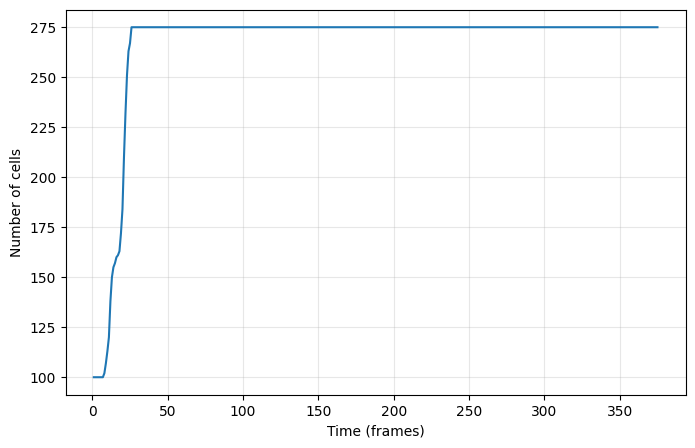

In [4]:
# Example usage of num_elements_per_frame
N_cells = num_elements_per_frame(dcells_path, N_frames)
t = np.arange(1, N_frames + 1)  # Creates array from 1 to N_frames inclusive

plt.figure(figsize=(8, 5))
plt.plot(t, N_cells)
plt.xlabel("Time (frames)")
plt.ylabel("Number of cells")
plt.grid(True, alpha=0.3)

# Examples to save a figure in .png and .pdf formats
plt.savefig(os.path.join(folder_path, "figures", "number_of_cells.png"), 
            bbox_inches="tight", dpi=300)
plt.savefig(os.path.join(folder_path, "figures", "number_of_cells.pdf"), 
            bbox_inches="tight")

# Show the plot (optional in Jupyter notebooks)
plt.show()

## **c)** Quantitative analysis of tissue arquitecture

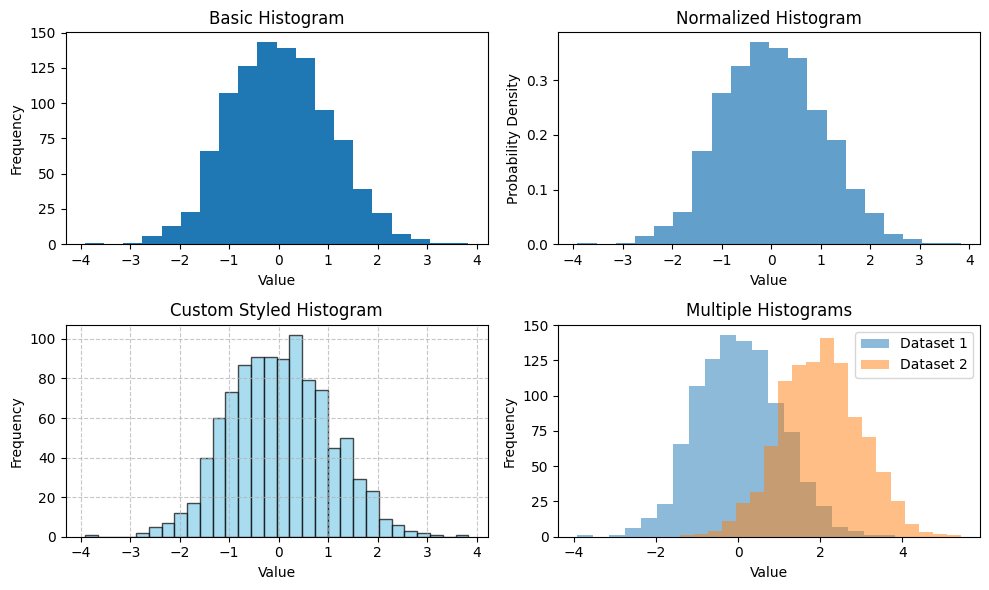

In [5]:
def plot_histogram_example(data):
    """Plot multiple histogram variations in a single figure.
    
    Args:
        data: Array-like data to plot
    """
    plt.figure(figsize=(10, 6))
    
    # Plot 1: Basic histogram
    plt.subplot(2, 2, 1)
    plt.hist(data, bins=20)
    plt.title("Basic Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    
    # Plot 2: Normalized histogram
    plt.subplot(2, 2, 2)
    plt.hist(data, bins=20, density=True, alpha=0.7)
    plt.title("Normalized Histogram")
    plt.xlabel("Value")
    plt.ylabel("Probability Density")
    
    # Plot 3: Custom styling
    plt.subplot(2, 2, 3)
    plt.hist(data, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title("Custom Styled Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle="--", alpha=0.7)
    
    # Plot 4: Multiple histograms
    plt.subplot(2, 2, 4)
    data2 = np.random.randn(1000) + 2  # Shifted distribution
    plt.hist(data, bins=20, alpha=0.5, label="Dataset 1")
    plt.hist(data2, bins=20, alpha=0.5, label="Dataset 2")
    plt.title("Multiple Histograms")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
data = np.random.randn(1000)  # 1000 random numbers from standard normal distribution
plot_histogram_example(data)

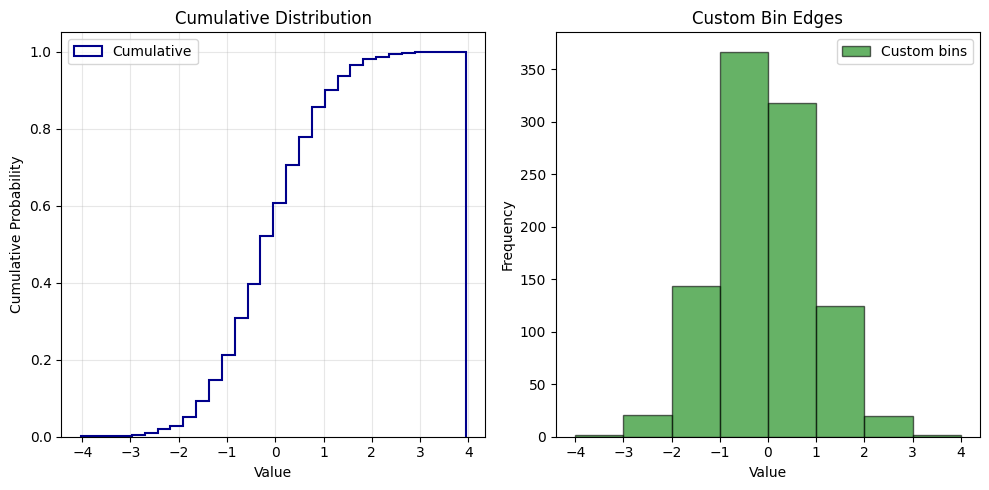

In [8]:
def advanced_histogram_example(data):
    """Plot advanced histogram variations including cumulative distribution and custom bins.
    
    Args:
        data: Array-like data to plot
    """
    plt.figure(figsize=(10, 5))
    
    # Histogram with cumulative distribution
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, cumulative=True, histtype='step', 
             density=True, label='Cumulative', color='darkblue', linewidth=1.5)
    plt.title("Cumulative Distribution")
    plt.xlabel("Value")
    plt.ylabel("Cumulative Probability")
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Histogram with custom bin edges
    plt.subplot(1, 2, 2)
    bin_edges = [-4, -3, -2, -1, 0, 1, 2, 3, 4]  # Custom bin edges
    plt.hist(data, bins=bin_edges, color='green', alpha=0.6, 
             edgecolor='black', label='Custom bins')
    plt.title("Custom Bin Edges")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


# Example usage
data = np.random.randn(1000)  # 1000 random numbers from standard normal distribution
advanced_histogram_example(data)

<Figure size 640x480 with 0 Axes>

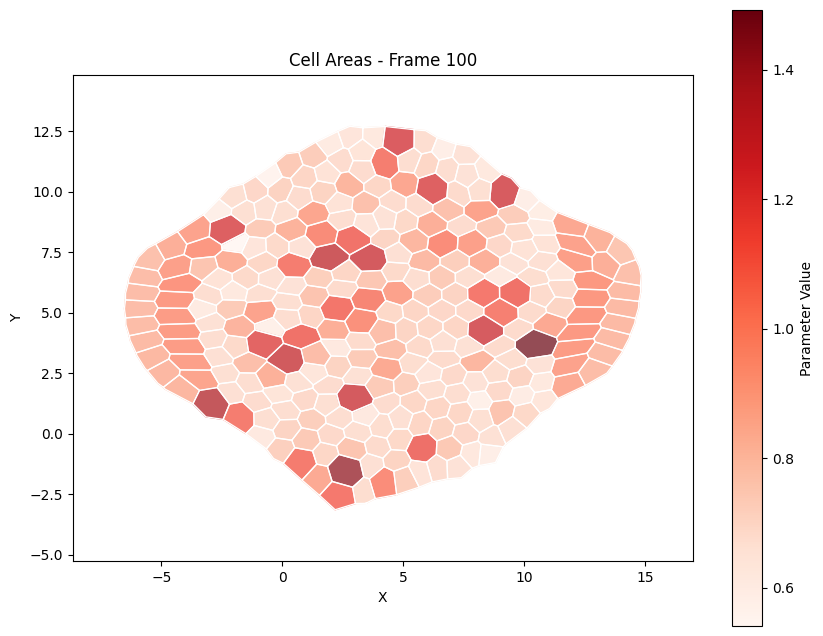

In [7]:
# Example usage
frame_number = 100  # Change this to plot a different frame
cell_tags_plot = cell_tags_frame(dcells_info_global[frame_number])
lines_dcells = dcells_info_global[frame_number]

# Calculate areas for all cells
data = [area_cell(tag, lines_dcells) for tag in cell_tags_plot]

# Plot cells with colormap
fig, ax = plot_cells_with_colormap(cell_tags_plot, data, lines_dcells, "Reds")
plt.title(f"Cell Areas - Frame {frame_number}")
plt.show()

### **c.1)** Neighbours distribution

In [9]:
# Example usage
cell_tag = "11"
neighbor_count = num_nearest_neighbours_cell(cell_tag, dcells_info_global[0])  # Note Python uses 0-based indexing

print(f"Cell {cell_tag} has {neighbor_count} nearest neighbors in frame 1")

Cell 11 has 6 nearest neighbors in frame 1


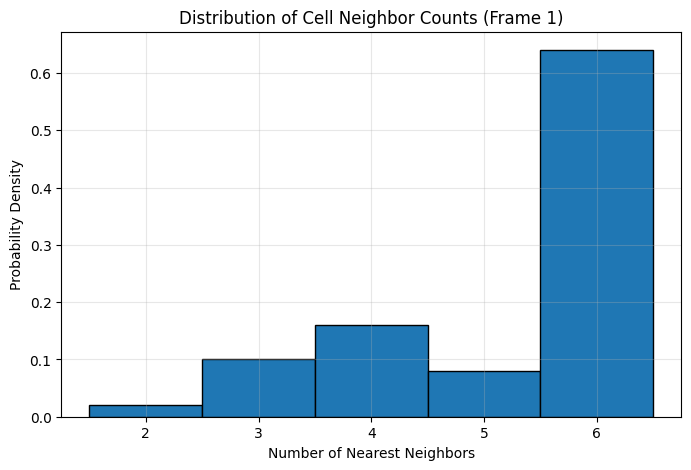

In [10]:
# Get the first frame's data (index 0 in Python)
lines_dcells = dcells_info_global[0]

# Calculate number of neighbors for each cell
data = []
for line in lines_dcells:
    elements = line.split()
    if len(elements) > 1:  # Ensure line has enough elements
        cell_tag = elements[0]  # First element is the cell tag
        neighbor_count = num_nearest_neighbours_cell(cell_tag, lines_dcells)
        data.append(neighbor_count)

# Calculate min and max values
min_val = min(data)
max_val = max(data)

# Create bin edges at ±0.5 around each integer value
bin_edges = np.arange(min_val-0.5, max_val+1.5, 1)  # +1.5 to include max_val+0.5

# Create the histogram plot
plt.figure(figsize=(8, 5))
plt.hist(data, bins=bin_edges, edgecolor='black', density=True)

# Set x-ticks to integer values
unique_counts = sorted(set(data))
plt.xticks(unique_counts)

# Add labels and title
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Probability Density')
plt.title('Distribution of Cell Neighbor Counts (Frame 1)')
plt.grid(True, alpha=0.3)

plt.show()

### **c.2)** Area distribution

In [13]:
cell_tag = "0"
frame_index = 0 #Change this to the desired frame index (0-based)
try:
    cell_area = area_cell(cell_tag, dcells_info_global[frame_index])  # Python uses 0-based indexing
    print(f"Area of cell {cell_tag} in frame {frame_index}: {cell_area}")
except (IndexError, NameError) as e:
    print(f"Error: {e}")
    print("Make sure dcells_info_global is properly defined and contains data")

Area of cell 0 in frame 0: 1.0


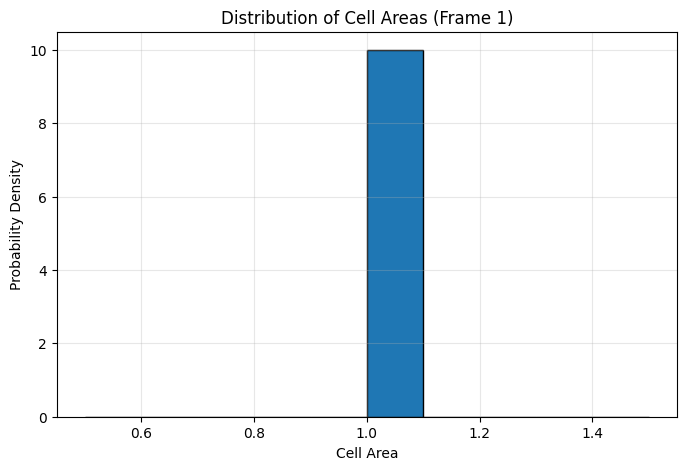

In [14]:
frame_index = 0  # Python uses 0-based indexing for the first frame
lines_dcells = dcells_info_global[frame_index]

# Calculate areas for all cells
data = []
for line in lines_dcells:
    elements = line.split()
    if len(elements) > 1:  # Ensure line has at least 2 elements (tag and area)
        cell_tag = elements[0]  # First element is the cell tag
        data.append(area_cell(cell_tag, lines_dcells))

# Create the histogram plot
plt.figure(figsize=(8, 5))
plt.hist(data, bins=10, edgecolor='black', density=True)

# Add labels and title
plt.xlabel('Cell Area')
plt.ylabel('Probability Density')
plt.title(f'Distribution of Cell Areas (Frame {frame_index + 1})')  # Display as 1-based to users
plt.grid(True, alpha=0.3)

plt.show()

### **c.3)** Perimeter distribution

In [2]:
# Example usage
cell_tag = "0"
vertices = vertices_cell(cell_tag, dcells_info_global[0])  # Python uses 0-based indexing for first frame

if vertices:  # Check if vertices were found
    print(f"Vertices of cell {cell_tag}: {vertices}")
    print(f"Perimeter of cell {cell_tag}: {perimeter(vertices):.2f}")  # Format to 2 decimal places
else:
    print(f"Cell {cell_tag} not found or has no vertices in frame 1")

Vertices of cell 0: [[0.310202, 0.537285], [0.620403, 0.0], [0.310202, -0.537285], [-0.310202, -0.537285], [-0.620403, 0.0], [-0.310202, 0.537285]]
Perimeter of cell 0: 3.72


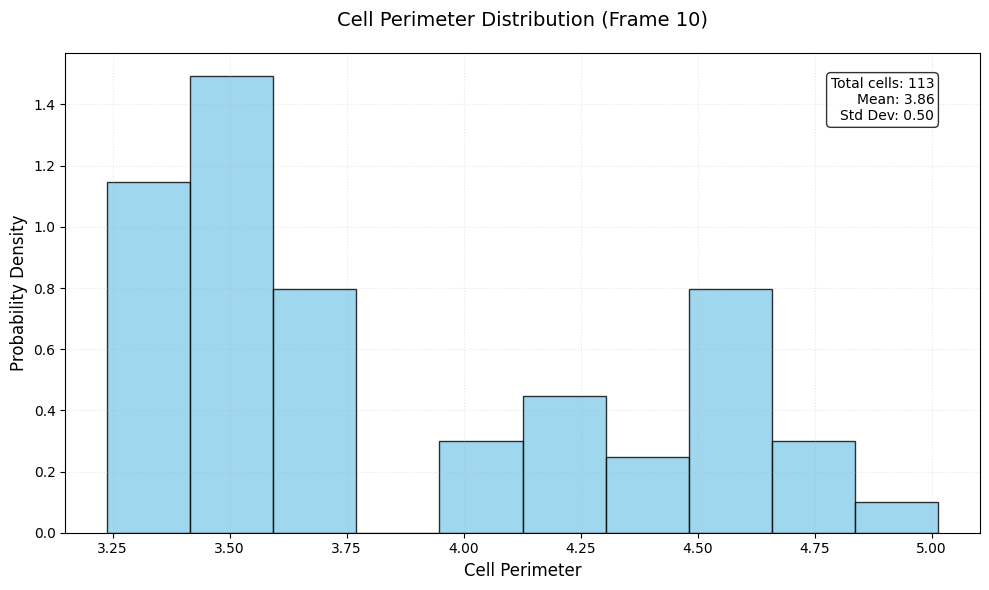

In [3]:
# Using 0-based indexing (frame 10 is index 9 in Python)
frame_index = 9  
lines_dcells = dcells_info_global[frame_index]

# Calculate perimeters for all cells with proper error handling
data = []
for line in lines_dcells:
    elements = line.split()
    if len(elements) > 1:  # Check if line has enough elements
        cell_tag = elements[0]  # First element is cell tag
        vertices = vertices_cell(cell_tag, lines_dcells)
        if vertices:  # Only proceed if vertices were found
            data.append(perimeter(vertices))

# Create the histogram plot with enhanced styling
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data, 
                           bins=10, 
                           edgecolor='black', 
                           density=True,
                           color='skyblue',
                           alpha=0.8)

# Add professional formatting
plt.xlabel('Cell Perimeter', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title(f'Cell Perimeter Distribution (Frame {frame_index+1})', fontsize=14, pad=20)
plt.grid(True, linestyle=':', alpha=0.3)

# Add statistics annotation
stats_text = (f"Total cells: {len(data)}\n"
              f"Mean: {np.mean(data):.2f}\n"
              f"Std Dev: {np.std(data):.2f}")
plt.annotate(stats_text, 
             xy=(0.95, 0.95), 
             xycoords='axes fraction',
             ha='right', 
             va='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### **c.4)** Polar distribution (cell main edge orientation)

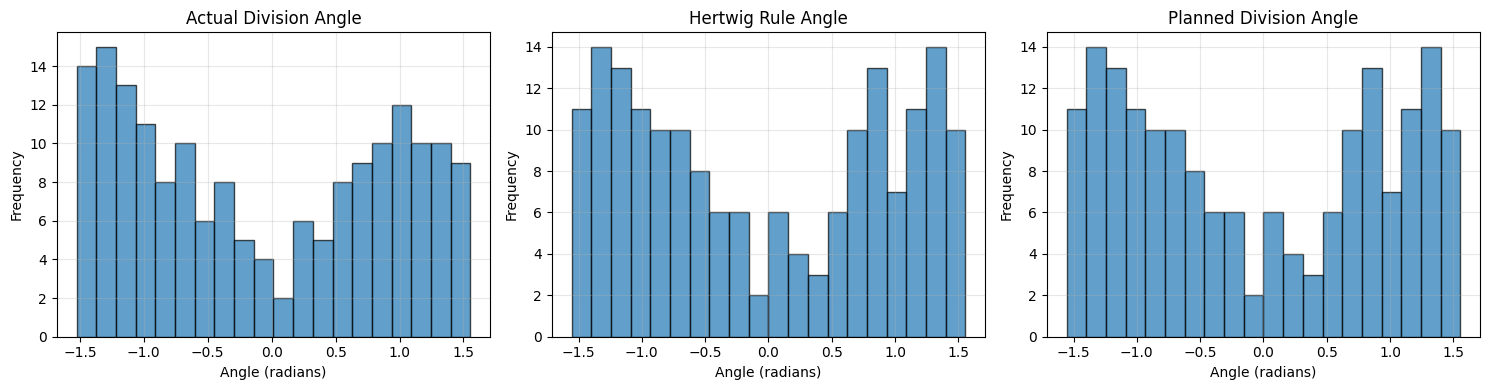

In [ ]:
def division_angles_matrix(lines_divisions: list[str]) -> np.ndarray:
    """Extract division angles from division data lines.
    
    Args:
        lines_divisions: List of strings containing division data
        
    Returns:
        3 x n array of angles (actual, Hertwig rule, planned)
    """
    n = len(lines_divisions)
    angles = np.zeros((3, n))
    for i, line in enumerate(lines_divisions):
        elements = line.split()
        angles[0, i] = float(elements[7])  # Actual division angle (0-based index)
        angles[1, i] = float(elements[8])  # Hertwig rule angle
        angles[2, i] = float(elements[9])  # Planned division angle
    return angles

# Example usage
with open(division_path, 'r') as f:
    lines_divisions = f.readlines()

angles_matrix = division_angles_matrix(lines_divisions)

# Create the figure with 3 subplots
plt.figure(figsize=(15, 4))

titles = ["Actual Division Angle", "Hertwig Rule Angle", "Planned Division Angle"]
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(angles_matrix[i, :], bins=20, edgecolor="black", alpha=0.7)
    plt.title(titles[i])
    plt.xlabel("Angle (radians)")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **c.5)** Force visualization and analysis

In [ ]:
# A couple of ideas:
# 1. Histograms with x and y components of the forces (total force or force from each contribution) 
# 2. Histogram of the modulus of the forces (total force or force from each contribution)

# Day 2: Modeling Rho-Myosin Interactions and Mechanical Perturbation

<ol style="list-style-type: none;">
  <li><strong>a)</strong> Quantifying tissue remodeling: T1 transitions as a function of space and time </li>
  <li><strong>b)</strong> Measuring Rho-Myosin activity from the single-cell to tissue level </li>
  <li><strong>c)</strong> <span style="color: yellow;"> Extra </span> Spatial correlation analysis of cell neighbor networks (correlations between neighbouring cells in whichever parameter: rho/myosin concentration, area, perimeter, ...)
</ol>

### **a)** Quantifying tissue remodeling: T1 transitions as a function of space and time

In [4]:
# Example usage
t1_transitions = read_t1_transitions(tifosi_log_path)

# Print the first transition with coordinates
if t1_transitions:  # Check if list is not empty
    t = t1_transitions[0]  # Python uses 0-based indexing
    print(f"Frame {t['frame']}, substep {t['substep']}:")
    print(f"  Before coordinates: {t['before_coords']}")
    print(f"  After coordinates: {t['after_coords']}")
    print(f"  Cells before: {t['cells_before']}")
    print(f"  Cells after: {t['cells_after']}")
else:
    print("No T1 transitions found in the log file.")

Frame 1, substep 5:
  Before coordinates: ((1.57424, 8.87067), (1.53271, 8.91677))
  After coordinates: ((1.57652, 8.91448), (1.53043, 8.87296))
  Cells before: (29, 18)
  Cells after: (28, 19)


Total transitions before frame 100: 1890


1890

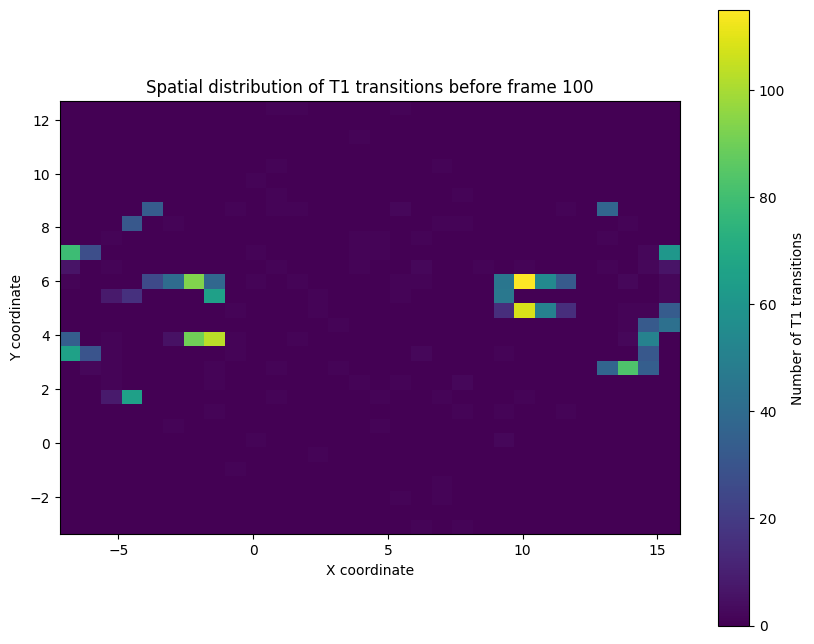

In [5]:
# Example usage
t1_transitions = read_t1_transitions(tifosi_log_path)

# Example usage
frame_of_interest = 100  # Analyze up to frame 100
plot_t1_spatial_distribution(t1_transitions, frame_of_interest)

### **b)** Measuring Rho-Myosin activity from the single-cell to tissue level

Protein concentrations in cell 0:
  Rho: 0.0000 (concentration)
  Myosin: 0.0000 (concentration)


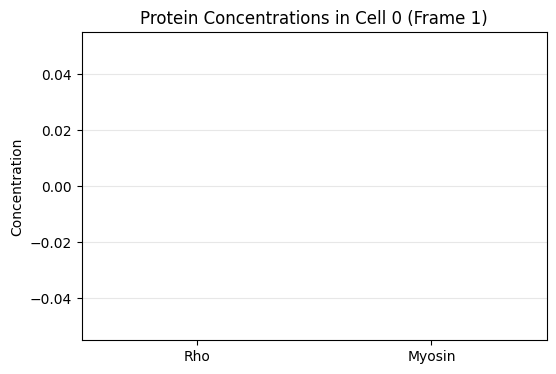

In [6]:
# Example usage
frame_number = 0  # Python uses 0-based indexing (first frame is 0)
cell_tag = "0"
lines_dcells = dcells_info_global[frame_number]  # Get first frame's data

try:
    concentrations = protein_concentrations_per_cell(cell_tag, lines_dcells)
    print(f"Protein concentrations in cell {cell_tag}:")
    print(f"  Rho: {concentrations[0]:.4f} (concentration)")
    print(f"  Myosin: {concentrations[1]:.4f} (concentration)")
    
    # Optional visualization
    plt.figure(figsize=(6, 4))
    plt.bar(['Rho', 'Myosin'], concentrations, color=['skyblue', 'salmon'])
    plt.title(f"Protein Concentrations in Cell {cell_tag} (Frame {frame_number+1})")
    plt.ylabel("Concentration")
    plt.grid(True, axis='y', alpha=0.3)
    plt.show()

except IndexError:
    print(f"Error: Cell {cell_tag} not found in frame {frame_number+1}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

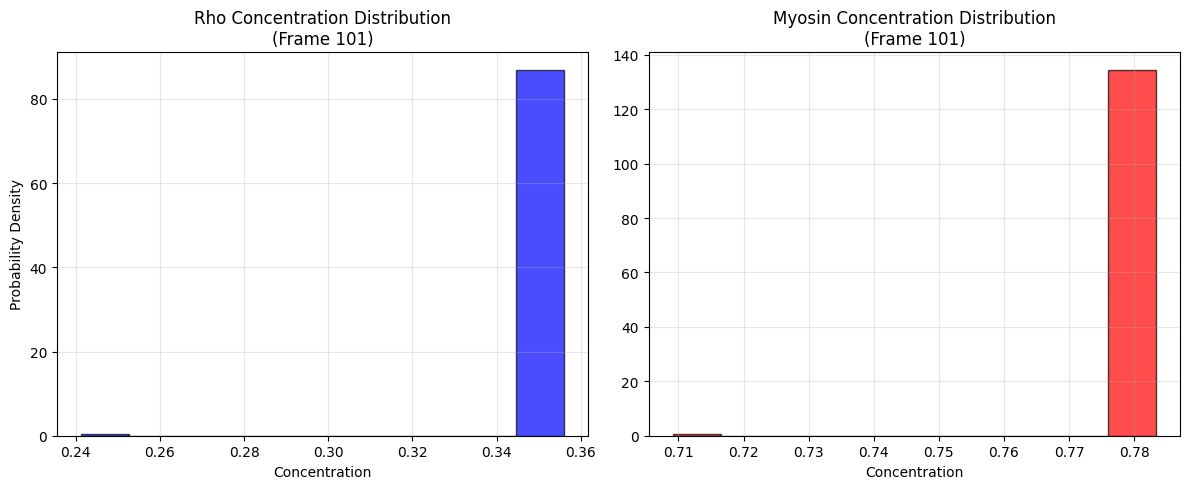

In [9]:
frame_number = 100  # Python uses 0-based indexing
lines_dcells = dcells_info_global[frame_number]

# Initialize lists to store concentrations
rho_concentrations = []
M_concentrations = []

# Collect data for all cells
for line in lines_dcells:
    elements = line.split()
    if len(elements) > 1:  # Ensure line has cell data
        cell_tag = elements[0]  # First element is cell tag
        try:
            concentrations = protein_concentrations_per_cell(cell_tag, lines_dcells)
            rho_concentrations.append(concentrations[0])
            M_concentrations.append(concentrations[1])
        except Exception as e:
            print(f"Error processing cell {cell_tag}: {str(e)}")
            continue

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot Rho distribution
plt.subplot(1, 2, 1)
plt.hist(rho_concentrations, bins=10, edgecolor='black', density=True, color='blue', alpha=0.7)
plt.title('Rho Concentration Distribution\n(Frame {})'.format(frame_number + 1))
plt.xlabel('Concentration')
plt.ylabel('Probability Density')
plt.grid(True, alpha=0.3)

# Plot Myosin distribution
plt.subplot(1, 2, 2)
plt.hist(M_concentrations, bins=10, edgecolor='black', density=True, color='red', alpha=0.7)
plt.title('Myosin Concentration Distribution\n(Frame {})'.format(frame_number + 1))
plt.xlabel('Concentration')
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Save figures
output_dir = os.path.join(folder_path, "figures")
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, f'protein_concentrations_frame_{frame_number+1}.png'), 
            bbox_inches='tight', dpi=300)
plt.show()

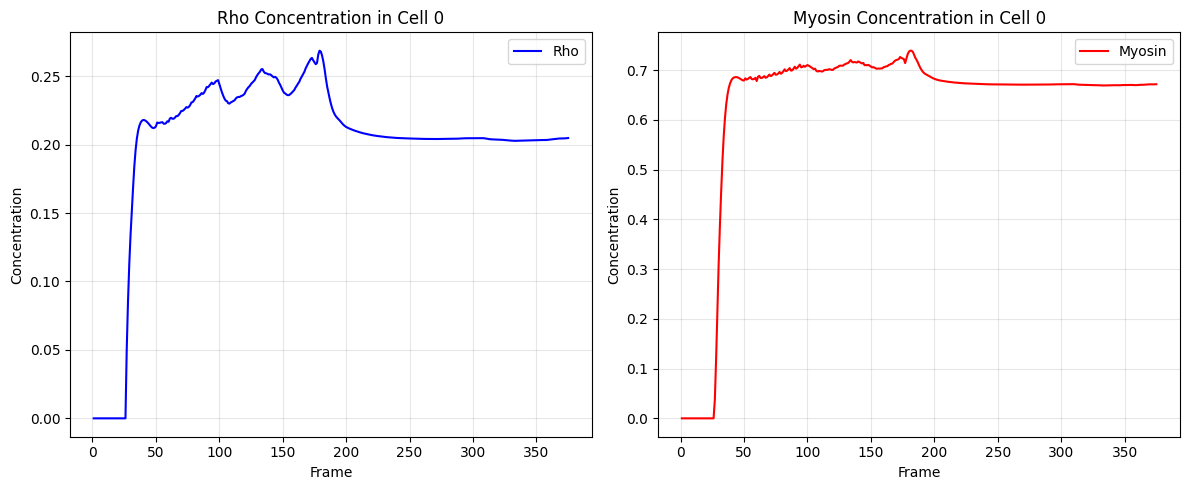

In [7]:
# Configuration
cell_tag = "0"
t = np.arange(1, N_frames + 1)  # Frame numbers (1-based)
data_rho = np.zeros(N_frames)
data_M = np.zeros(N_frames)

# Collect concentration data
for i in range(N_frames):
    lines_dcells = dcells_info_global[i]  # Python uses 0-based indexing
    concentrations = protein_concentrations_per_cell(cell_tag, lines_dcells)
    data_rho[i] = concentrations[0]  # Rho concentration
    data_M[i] = concentrations[1]    # Myosin concentration

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot Rho concentration
plt.subplot(1, 2, 1)
plt.plot(t, data_rho, 'b-', label="Rho")
plt.title(f"Rho Concentration in Cell {cell_tag}")
plt.ylabel("Concentration")
plt.xlabel("Frame")
plt.grid(True, alpha=0.3)
plt.legend()

# Plot Myosin concentration
plt.subplot(1, 2, 2)
plt.plot(t, data_M, 'r-', label="Myosin")
plt.title(f"Myosin Concentration in Cell {cell_tag}")
plt.ylabel("Concentration")
plt.xlabel("Frame")
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()

# Save figures
rho_path = os.path.join(folder_path, "figures", f"rho_concentration_cell_{cell_tag}.png")
M_path = os.path.join(folder_path, "figures", f"M_concentration_cell_{cell_tag}.png")
#plt.savefig(rho_path, bbox_inches="tight", dpi=300)
#plt.savefig(M_path, bbox_inches="tight", dpi=300)

plt.show()

### **c)** Extra: Spatial correlation analysis of cell neighbor networks 

In [10]:
cell_tag = "0"
try:
    lines_dcells = dcells_info_global[0]  # 0-based index for first frame
    neighbors = nearest_neighbours_cell(cell_tag, lines_dcells)
    
    if neighbors:
        print(f"\nCell {cell_tag} has {len(neighbors)} neighbors in frame 1:")
        print("Neighbor tags:", ", ".join(neighbors))
        
        # Optional: Calculate neighbor statistics
        neighbor_areas = []
        for neighbor_tag in neighbors:
            area = area_cell(neighbor_tag, lines_dcells)
            neighbor_areas.append(area)
        
        print("\nNeighbor statistics:")
        print(f"Average area: {np.mean(neighbor_areas):.2f}")
        print(f"Min area: {np.min(neighbor_areas):.2f}")
        print(f"Max area: {np.max(neighbor_areas):.2f}")
    else:
        print(f"Cell {cell_tag} has no neighbors or wasn't found in frame 1")
        
except Exception as e:
    print(f"Error: {str(e)}")


Cell 0 has 2 neighbors in frame 1:
Neighbor tags: 10, 1

Neighbor statistics:
Average area: 1.00
Min area: 1.00
Max area: 1.00
